## Example of Working with Astronomical Data
#### Mollie Conrad, MSc.
#### November 2019


Data acquired from the Herschel Scienca Archives (HSA) via the European Space Agency (ESA) archival database. OBSID = 1342192362. Data reduction and spectral fitting conducted with HIPE v15.0.0.

---

The following report is an example of the thesis submitted in October 2018: https://uwspace.uwaterloo.ca/handle/10012/13855.

Here in this brief report, we plot water isotopologue (H$_2$$^{18}$O - 547 GHz) spectra emitted from NGC 7129 FIRS 2, a star-forming region located at a distance of 1250 pc.

---

The main datafile contains two columns of spectral data - the first being the light velocity (or conversely, the light frequency) of the measured spectra, measured in km/s, and the second being the intensity, measured as Antenna Temperature in Kelvin (K). 

We also consider 2 datafiles for 2 fitted Gaussians (used to measure the contributions of emitters such as cores, outflows, foreground clouds, etc.), and the residual - the data remaining after the subtraction of the Gaussians from the spectral data. We expect that the residuals will be within a 3$\sigma$ (standard deviation) range, assuming the Gaussians were fitted properly.

Finally, after using the Fortran radiative-transfer code, RATRAN, to model the expected emission from NGC 7129 FIRS 2, we import the data file into this code and compare the results to the observations both visually and statistically.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.time()

In [2]:
# Separating x (velocity) and y (intensity) components for smoothed 
# spectral data
baseline = np.loadtxt("data/A18_dec29_nometa.txt", 
                      delimiter=",")
baseline_x = baseline[:,0]
baseline_y = baseline[:,1]

# Separating x (velocity) and y (intensity) components for first  
# fitted Gaussian Component
Gaussian1 = np.loadtxt("data/A18_dec29_SFGModel_M1.txt")
Gaussian1_x = Gaussian1[:,0]
Gaussian1_y = Gaussian1[:,1]

# Separating x (velocity) and y (intensity) components for second 
# fitted Gaussian Component
Gaussian2 = np.loadtxt("data/A18_dec29_SFGModel_M2.txt")
Gaussian2_x = Gaussian2[:,0]
Gaussian2_y = Gaussian2[:,1]

# Separating x (velocity) and y (intensity) components for residual of 
# spectral data  after Gaussian removal in HIPE (Herschel Interactive 
# Processing Environment), v 15.0.0
residualData = np.loadtxt("data/A18_dec29_SFGResidual_res.txt")
residual_x = residualData[:,0]
residual_y = residualData[:,1]

In [3]:
# We'd like to determine the standard deviation of the residual to a
# 3sigma level within a specific velocity range, (-20, 10) km/s:
v1 = -20.0
v2 = 10.0
rangeValues = [residual_y[i] 
               for i in range(len(residual_x)) 
               if v1 <= residual_x[i] <= v2]

# Number of points included in this range:
print ("Number of points included within velocity range", (v1,v2), " km/s =", len(rangeValues))

# Standard deviation = sigma:
standardDev = np.std(rangeValues)
print ("Standard Deviation (sigma) =", standardDev, "K")
print ("3 * Sigma =",  3.0*standardDev, "K")

Number of points included within velocity range (-20.0, 10.0)  km/s = 110
Standard Deviation (sigma) = 0.005511902432029007 K
3 * Sigma = 0.01653570729608702 K


In [4]:
# Determining our maximum antenna temperature:
print ("Max Intensity = ", max(baseline_y))

Max Intensity =  0.0311316409295802


In [5]:
# Binning the spectral data with respect to the channels of the receiver:
def histogramchannels(x,y):
    dxby2=(x[1]-x[0])/2.
    xx=[]
    yy=[]
    xx.append(x[0]-dxby2)
    yy.append(0.)
    n=len(x)
    for i in range(0,n):
        xx.append(x[i]-dxby2)
        yy.append(y[i])
        xx.append(x[i]+dxby2)
        yy.append(y[i])
    xx.append(x[n-1]+dxby2)
    yy.append(0.0)
    return(xx,yy)

Generating figure to visualize spectral observations, Gaussian fits, residual, and 3$\sigma$ levels:

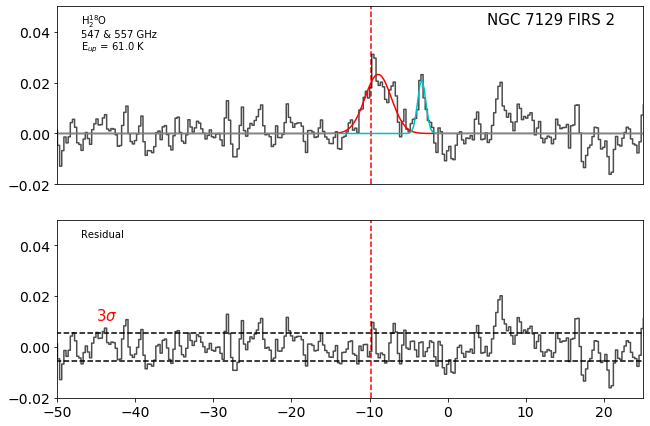

In [6]:
fig1, ax1 = plt.subplots(2, sharey=True, figsize=(10.5, 7.2))

v_lsr, ymin, ymax = -9.8, -0.02, 0.05
Ry18 = 0.04
Rx18 = 8.0

# Plotting spectral observations
xx,yy=histogramchannels(baseline_x, baseline_y)
ax1[0].plot(xx, yy, color='k', alpha=0.7)

# Plotting Gaussian components
ax1[0].plot(Gaussian1_x, Gaussian1_y, color='r')
ax1[0].plot(Gaussian2_x, Gaussian2_y, color='c')

# Setting plotting x,y limits
ax1[0].set_xlim(-50.0, 25.0)
ax1[0].set_ylim(ymin, 0.05)

# Adding descriptive text to figure
ax1[0].text(-47, 0.043, r'H$_2^{18}$O', fontsize=10)
ax1[0].text(-47, 0.038, r'547 & 557 GHz', fontsize=10)
ax1[0].text(-47, 0.033, r'E$_{up}$ = 61.0 K', size=10)
ax1[0].text(5, 0.043, r'NGC 7129 FIRS 2', size = 15)

# Marking where the LSR velocity occurs for NGC 7129 FIRS 2
ax1[0].vlines(v_lsr, ymin, ymax, linestyles='--', color='r')

# Modifying tick parameters - visibility, size
ax1[0].axes.get_xaxis().set_ticks([])
ax1[0].yaxis.get_major_ticks()[-1].label1.set_visible(False)
ax1[0].tick_params(axis='both', which='major', labelsize=14)
ax1[0].tick_params(axis='both', which='minor', labelsize=8)

# -----------------
# Plotting residual of observations on second subplot
rxx,ryy=histogramchannels(residual_x, residual_y)
ax1[1].plot(rxx,ryy, color='k', alpha=0.7)

# Setting limits on x
ax1[1].set_xlim(-50.0, 25.0)

# Adding descriptive text
ax1[1].text(-45.0, standardDev+0.005, r'3$\sigma$', fontsize=15, color='r')
ax1[1].text(-47, 0.043, r'Residual', fontsize = 10)

# Adding horizontal line marking where 3 Sigma level occurs
ax1[1].hlines(standardDev, min(residual_x), max(residual_x), linestyles='--')
ax1[1].hlines(-1.0 * standardDev, min(residual_x), max(residual_x), linestyles='--')

# Adding the LSR velocity vertical line
ax1[1].vlines(v_lsr, ymin, ymax, linestyles='--', color='r')

# Modifying tick parameters
ax1[1].xaxis.get_major_ticks()[-1].label1.set_visible(False)
ax1[1].tick_params(axis='both', which='major', labelsize=14)
ax1[1].tick_params(axis='both', which='minor', labelsize=8)

plt.show()

In [7]:
# Importing and splitting x,y components of data
RATRAN_data = np.loadtxt("data/Aug3_pure4_8_001.txt")
h218o_x = RATRAN_data[:,1]
h218o_y = RATRAN_data[:,2]

Generating figure to visualize and compare the model to the observations:

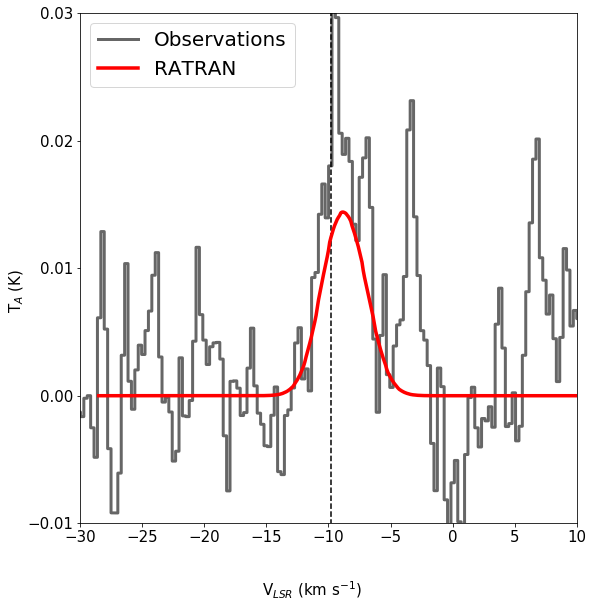

In [8]:
fig2, ax2 = plt.subplots(1, figsize=(9.2, 9.2))
v_lsr2 = -8.6

xmin = -30.0
xmax = 10.0
ymin = -0.035
ymax = 1.0
xlabel = "V$_{LSR}$ (km s$^{-1}$)"
ylabel = "T$_A$ (K)"

# Plotting observations
xx,yy=histogramchannels(baseline_x, baseline_y)
ax2.plot(xx, yy, color='k', alpha=0.6,label='Observations', linewidth=3.0)

# Plotting RATRAN model
ax2.plot(h218o_x+v_lsr2, h218o_y, c='r', linewidth=3.5, label=r'RATRAN')

# Setting x and y plotting limits
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(-0.01, 0.03)

# Adding a vertical line marking where the LSR velocity occurs
ax2.vlines(v_lsr, ymin-0.01, ymax+0.01, linestyles='--', color='k')

# Altering tick visibility and size
ax2.yaxis.get_major_ticks()[-1].label1.set_visible(False)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='minor', labelsize=8)

# Altering Tick Frequency
ax2.locator_params(axis='y', nbins=6)        
ax2.locator_params(axis='x', nbins=10)

# Adding Legend
ax2.legend(loc=2, prop={'size': 20}, fancybox=True, framealpha=0.8)

# Adjusting space around plot and labels
plt.subplots_adjust(left=0.15, bottom=0.15, right=None, top=0.92,
                    wspace=0.0, hspace=0.0)

# Adding labels to axes
fig2.text(0.5, 0.04, xlabel, ha='center', size=15)
fig2.text(0.04, 0.5, ylabel, va='center', rotation='vertical', size=15)

plt.show()

Now determining the goodness of fit with a chi-squared ($\chi^2$), and reduced chi-squared ($\chi^2_R$) calculation between the RATRAN model and the observations. Please note, we are only considering the central modelled component, not the component located at -3.7 km/s. We expect this to be a foreground cloud, likely unassociated with NGC 7129 FIRS 2.

In [9]:
# Moving RATRAN model to be centered on v_LSR
newRATRAN_x = [(h218o_x[i] - 7.8) for i in range(len(h218o_x))]

# Truncating dataset (observations and Gaussian) to specific velocity range (-13, -4)
truncRATRAN_x = [newRATRAN_x[i] for i in range(len(newRATRAN_x)) if -13.0 <= newRATRAN_x[i] <= -4.0]
truncRATRAN_y = [h218o_y[i] for i in range(len(newRATRAN_x)) if -13.0 <= newRATRAN_x[i] <= -4.0]

truncObs_x = [baseline_x[i] for i in range(len(baseline_x)) if -13.0 <= baseline_x[i] <= -4.0]
truncObs_y = [baseline_y[i] for i in range(len(baseline_x)) if -13.0 <= baseline_x[i] <= -4.0]

truncObs_x = truncObs_x[::-1]  #reversing order of list
truncObs_y = truncObs_y[::-1]  #reversing order of list

# Interpolating points to ensure both datasets match in velocity (x)
newObs_y = np.interp(truncRATRAN_x, truncObs_x, truncObs_y) 

# Defining the chi-squared calculation
def chi2(obs, ratran, sigma):
    return (ratran-obs)**2/(sigma**2)

# Determining the chi-squared
chi2_Obs = sum((chi2(truncRATRAN_y[i], newObs_y[i], standardDev)) for i in range(len(newObs_y)))
print ("Chi Square =", chi2_Obs)

# Determining degrees of freedom
variablesUsed = 2.0 
v = len(truncRATRAN_x) - variablesUsed
print ("DoF =", v)

# Defining Reduced Chi-squared
def chired(X):
    return(np.sqrt(X/v))

# Calculating Reduced Chi-squared
reducedChi2 = chired(chi2_Obs)
print ("Reduced Chi Squared =", reducedChi2)

Chi Square = 151.65787351557853
DoF = 89.0
Reduced Chi Squared = 1.3053815728501905


Thus, based on the results, our model is *under-fitting* the spectral data.

In [10]:
elapsed_time = time.time() - start_time
print (elapsed_time)

1.3954026699066162
